# 9.1//Introduction to iterators
#### Iterating over iterables (1)


In [1]:
# Create a list of strings: flash
flash = ['jay garrick', 'barry allen', 'wally west', 'bart allen']

# Print each list item in flash using a for loop

for person in flash:
    print(person)

# Create an iterator for flash: superhero

superhero=iter(flash)

# Print each item from the iterator
print(next(superhero))
print(next(superhero))
print(next(superhero))
print(next(superhero))

jay garrick
barry allen
wally west
bart allen
jay garrick
barry allen
wally west
bart allen


#### Iterating over iterables (2)

In [2]:
# Create an iterator for range(3): small_value
small_value = iter(range(3))

# Print the values in small_value
print(next(small_value))
print(next(small_value))
print(next(small_value))

# Loop over range(3) and print the values
for num in range(3):
    print(num)


# Create an iterator for range(10 ** 100): googol
googol = iter(range(10**100))

# Print the first 5 values from googol
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))
print(next(googol))

0
1
2
0
1
2
0
1
2
3
4


#### Iterators as function arguments

In [3]:
# Create a list of integers: values_list
values_list = list(values)

# Print values_list
print(values_list)

# Get the sum of values: values_sum
values_sum = sum(values)

# Print values_sum
print(values_sum)

NameError: name 'values' is not defined

## 9.1.2 enumerate and zip

#### Using enumerate
You're really getting the hang of using iterators, great job!

You've just gained several new ideas on iterators from the last video and one of them is the enumerate() function. Recall that enumerate() returns an enumerate object that produces a sequence of tuples, and each of the tuples is an index-value pair.

In [4]:
# Create a list of strings: mutants
mutants = ['charles xavier', 
            'bobby drake', 
            'kurt wagner', 
            'max eisenhardt', 
            'kitty pryde']

# Create a list of tuples: mutant_list
mutant_list = list(enumerate(mutants))

# Print the list of tuples
print(mutant_list)

# Unpack and print the tuple pairs
for index1, value1 in enumerate(mutants):           #####we are not using mutan_list
    print(index1, value1)

# Change the start index
for index2,value2 in enumerate(mutants,start=1):
    print(index2, value2)


[(0, 'charles xavier'), (1, 'bobby drake'), (2, 'kurt wagner'), (3, 'max eisenhardt'), (4, 'kitty pryde')]
0 charles xavier
1 bobby drake
2 kurt wagner
3 max eisenhardt
4 kitty pryde
1 charles xavier
2 bobby drake
3 kurt wagner
4 max eisenhardt
5 kitty pryde


In [11]:
import pandas as pd
df=pd.DataFrame(mutant_list)
print(df)

   0               1
0  0  charles xavier
1  1     bobby drake
2  2     kurt wagner
3  3  max eisenhardt
4  4     kitty pryde


#### zipp

In [15]:
aliases=['prof x', 'iceman', 'nightcrawler', 'magneto', 'shadowcat']
powers=('telepathy', 'thermokinesis', 'teleportation', 'magnetokinesis', 'intangibility')

# Create a list of tuples: mutant_data
mutant_data = list(zip(mutants,aliases,powers))

# Print the list of tuples
print(mutant_data)

#Create a zip object using the three lists: mutant_zip
mutant_zip = zip(mutants,aliases,powers)

# Print the zip object
print(mutant_zip)

# Unpack the zip object and print the tuple values
for value1,value2,value3 in (mutant_zip):
    print(value1, value2, value3)

[('charles xavier', 'prof x', 'telepathy'), ('bobby drake', 'iceman', 'thermokinesis'), ('kurt wagner', 'nightcrawler', 'teleportation'), ('max eisenhardt', 'magneto', 'magnetokinesis'), ('kitty pryde', 'shadowcat', 'intangibility')]
charles xavier prof x telepathy
bobby drake iceman thermokinesis
kurt wagner nightcrawler teleportation
max eisenhardt magneto magnetokinesis
kitty pryde shadowcat intangibility


#### Using * and zip to 'unzip'

In [16]:
# Create a zip object from mutants and powers: z1
z1 = zip(mutants,powers)

#Print the tuples in z1 by unpacking with *
print(*z1)

# Because the previous print() call would have exhausted the elements in # z1 Re-create a zip object from mutants and powers: z1
z1 = zip(mutants,powers)

# 'Unzip' the tuples in z1 by unpacking with * and zip(): result1, result2
result1, result2 = zip(*z1)

# Check if unpacked tuples are equivalent to original tuples
print('result1',result1)
print(mutants)
print(result1 == mutants)
print(result2==powers)

('charles xavier', 'telepathy') ('bobby drake', 'thermokinesis') ('kurt wagner', 'teleportation') ('max eisenhardt', 'magnetokinesis') ('kitty pryde', 'intangibility')
result1 ('charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde')
['charles xavier', 'bobby drake', 'kurt wagner', 'max eisenhardt', 'kitty pryde']
False
True


## 9.1.3// Using iterators to load large files into memory
#### Processing large amounts of Twitter data
Sometimes, the data we have to process reaches a size that is too much for a computer's memory to handle. This is a common problem faced by data scientists. A solution to this is to process an entire data source chunk by chunk, instead of a single go all at once.In this exercise, you will do just that. You will process a large csv file of Twitter data in the same way that you processed 'tweets.csv' in Bringing it all together exercises of the prequel course, but this time, working on it in chunks of 10 entries at a time.

In [15]:
# Initialize an empty dictionary: counts_dict
import pandas as pd
counts_dict={}
# Iterate over the file chunk by chunk
for chunk in pd.read_csv('G:\\datacamp\\9. data science toolbox2\\tweets.csv',chunksize=10):

    # Iterate over the column in DataFrame
    for entry in chunk['lang']:
        if entry in counts_dict.keys():
            counts_dict[entry] += 1
        else:
            counts_dict[entry] = 1

# Print the populated dictionary
print(counts_dict)

{'en': 97, 'et': 1, 'und': 2}


#### Extracting information for large amounts of Twitter data
Great job chunking out that file in the previous exercise. You now know how to deal with situations where you need to process a very large file and that's a very useful skill to have!

It's good to know how to process a file in smaller, more manageable chunks, but it can become very tedious having to write and rewrite the same code for the same task each time. In this exercise, you will be making your code more reusable

In [19]:
# Define count_entries()
def count_entries(csv_file,c_size,colname):
    """Return a dictionary with counts of
    occurrences as value for each key."""
    
    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Iterate over the file chunk by chunk
    for chunk in pd.read_csv(csv_file,chunksize=c_size):

        # Iterate over the column in DataFrame
        for entry in chunk[colname]:
            if entry in counts_dict.keys():
                counts_dict[entry] += 1
            else:
                counts_dict[entry] = 1

    # Return counts_dict
    return counts_dict

# Call count_entries(): result_counts
result_counts = count_entries('G:\\datacamp\\9. data science toolbox2\\tweets.csv',10,'lang')

# Print result_counts
print(result_counts)

{'en': 97, 'et': 1, 'und': 2}


## 9.2//List comprehensions and generators
#### 9.2.1// List comprehensions

In [30]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(0,5)] for row in range(2) for i in range(5)]
#print(row)   ### doesnt work
# Print the matrix
for x in matrix:
    print(x)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [24]:
# Create a 5 x 5 matrix using a list of lists: matrix
matrix2 = [[col for col in range(0,5)]]
#print(col)    ### doesnt work
# Print the matrix
for col in matrix2:
    print(col)

[0, 1, 2, 3, 4]


## 9.2.2 Advanced Comprehension
#### Using conditionals in comprehensions (1)
You've been using list comprehensions to build lists of values, sometimes using operations to create these values.

An interesting mechanism in list comprehensions is that you can also create lists with values that meet only a certain condition. One way of doing this is by using conditionals on iterator variables. In this exercise, you will do exactly that!

Recall from the video that you can apply a conditional statement to test the iterator variable by adding an if statement in the optional predicate expression part after the for statement in the comprehension:

[ output expression for iterator variable in iterable if predicate expression ].

In [32]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member)>=7]

# Print the new list
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


#### Using conditionals in comprehensions (2)
if-else

In [34]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member)>=7 else member.replace(member,'') for member in fellowship ]

# Print the new list
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


#### Dict comprehensions
Comprehensions aren't relegated merely to the world of lists. There are many other objects you can build using comprehensions, such as dictionaries, pervasive objects in Data Science. You will create a dictionary using the comprehension syntax for this exercise. In this case, the comprehension is called a dict comprehension.

In [ ]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {key:len(key) for key in fellowship }

# Print the new dictionary
print(new_fellowship)


### 9.2.3// Intro to Generator
#### Write your own generator expressions
You are familiar with what generators and generator expressions are, as well as its difference from list comprehensions. In this exercise, you will practice building generator expressions on your own.

Recall that generator expressions basically have the same syntax as list comprehensions, except that it uses parentheses () instead of brackets []; this should make things feel familiar! Furthermore, if you have ever iterated over a dictionary with .items(), or used the range() function, for example, you have already encountered and used generators before, without knowing it! When you use these functions, Python creates generators for you behind the scenes.

In [35]:
# Create generator object: result
result = (num for num in range(31))

# Print the first 5 values
print(next(result))
print(next(result))
print(next(result))
print(next(result))
print(next(result))

# Print the rest of the values
for value in result:
    print(value)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


#### Changing the output in generator expressions
Great! At this point, you already know how to write a basic generator expression. In this exercise, you will push this idea a little further by adding to the output expression of a generator expression. Because generator expressions and list comprehensions are so alike in syntax, this should be a familiar task for you!

In [41]:
# Create a list of strings: lannister
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Create a generator object: lengths
lengths = (len(person) for person in lannister)

# Iterate over and print the values in lengths
for value in lengths:
    print(value)

6
5
5
6
7
list[7]


#### List comprehensions for time-stamped data
Extract the column 'created_at' from df and assign the result to tweet_time. Fun fact: the extracted column in tweet_time here is a Series data structure!
Create a list comprehension that extracts the time from each row in tweet_time. Each row is a string that represents a timestamp, and you will access the 12th to 19th characters in the string to extract the time. Use entry as the iterator variable and assign the result to tweet_clock_time. Remember that Python uses 0-based indexing!

In [31]:
df=pd.read_csv('G:\\datacamp\\9. data science toolbox2\\tweets.csv')
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time]

# Print the extracted times
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:17', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:18', '23:40:18', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:18', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23

#### Conditional list comprehensions for time-stamped data
Extract the column 'created_at' from df and assign the result to tweet_time.
Create a list comprehension that extracts the time from each row in tweet_time. Each row is a string that represents a timestamp, and you will access the 12th to 19th characters in the string to extract the time. Use entry as the iterator variable and assign the result to tweet_clock_time. Additionally, add a conditional expression that checks whether entry[17:19] is equal to '19'.

In [43]:
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if entry[17:19] == '19']

# Print the extracted times
print(tweet_clock_time)


['23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19', '23:40:19']


## 9.3// Bring it all together
#### Dictionaries for data science
For this exercise, you'll use what you've learned about the zip() function and combine two lists into a dictionary.

These lists are actually extracted from a bigger dataset file of world development indicators from the World Bank. For pedagogical purposes, we have pre-processed this dataset into the lists that you'll be working with.

The first list feature_names contains header names of the dataset and the second list row_vals contains actual values of a row from the dataset, corresponding to each of the header names.

In [32]:
feature_names=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals=['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
row_lists=[['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298'], ['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547'], ['Arab World', 'ARB', 'Age dependency ratio, old (% of working-age population)', 'SP.POP.DPND.OL', '1960', '6.634579191565161'], ['Arab World', 'ARB', 'Age dependency ratio, young (% of working-age population)', 'SP.POP.DPND.YG', '1960', '81.02332950839141'], ['Arab World', 'ARB', 'Arms exports (SIPRI trend indicator values)', 'MS.MIL.XPRT.KD', '1960', '3000000.0'], ['Arab World', 'ARB', 'Arms imports (SIPRI trend indicator values)', 'MS.MIL.MPRT.KD', '1960', '538000000.0'], ['Arab World', 'ARB', 'Birth rate, crude (per 1,000 people)', 'SP.DYN.CBRT.IN', '1960', '47.697888095096395'], ['Arab World', 'ARB', 'CO2 emissions (kt)', 'EN.ATM.CO2E.KT', '1960', '59563.9892169935'], ['Arab World', 'ARB', 'CO2 emissions (metric tons per capita)', 'EN.ATM.CO2E.PC', '1960', '0.6439635478877049'], ['Arab World', 'ARB', 'CO2 emissions from gaseous fuel consumption (% of total)', 'EN.ATM.CO2E.GF.ZS', '1960', '5.041291753975099'], ['Arab World', 'ARB', 'CO2 emissions from liquid fuel consumption (% of total)', 'EN.ATM.CO2E.LF.ZS', '1960', '84.8514729446567'], ['Arab World', 'ARB', 'CO2 emissions from liquid fuel consumption (kt)', 'EN.ATM.CO2E.LF.KT', '1960', '49541.707291032304'], ['Arab World', 'ARB', 'CO2 emissions from solid fuel consumption (% of total)', 'EN.ATM.CO2E.SF.ZS', '1960', '4.72698138789597'], ['Arab World', 'ARB', 'Death rate, crude (per 1,000 people)', 'SP.DYN.CDRT.IN', '1960', '19.7544519237187'], ['Arab World', 'ARB', 'Fertility rate, total (births per woman)', 'SP.DYN.TFRT.IN', '1960', '6.92402738655897'], ['Arab World', 'ARB', 'Fixed telephone subscriptions', 'IT.MLT.MAIN', '1960', '406833.0'], ['Arab World', 'ARB', 'Fixed telephone subscriptions (per 100 people)', 'IT.MLT.MAIN.P2', '1960', '0.6167005703199'], ['Arab World', 'ARB', 'Hospital beds (per 1,000 people)', 'SH.MED.BEDS.ZS', '1960', '1.9296220724398703'], ['Arab World', 'ARB', 'International migrant stock (% of population)', 'SM.POP.TOTL.ZS', '1960', '2.9906371279862403'], ['Arab World', 'ARB', 'International migrant stock, total', 'SM.POP.TOTL', '1960', '3324685.0']]

In [33]:
# Zip lists: zipped_lists
zipped_lists = zip(feature_names,row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [35]:
                                       # Define lists2dict()  FUNCTION########
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides
    the keys and list2 provides the values."""

    # Zip lists: zipped_lists
    zipped_lists = zip(list1, list2)

    # Create a dictionary: rs_dict
    rs_dict = dict(zipped_lists)

    # Return the dictionary
    return rs_dict

# Call lists2dict: rs_fxn
rs_fxn = lists2dict(feature_names,row_vals)

# Print rs_fxn
print(rs_fxn)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


#### Using a list comprehension
This time, you're going to use the lists2dict() function you defined in the last exercise to turn a bunch of lists into a list of dictionaries with the help of a list comprehension.

In [36]:
# Print the first two lists in row_lists
print(row_lists[0])
print(row_lists[1])

# Turn list of lists into list of dicts: list_of_dicts
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]      ########lists2dict#####

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])
help(lists2dict)

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', '1960', '133.56090740552298']
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', '1960', '87.7976011532547']
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}
{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', 'IndicatorCode': 'SP.POP.DPND', 'Year': '1960', 'Value': '87.7976011532547'}
Help on function lists2dict in module __main__:

lists2dict(list1, list2)
    Return a dictionary where list1 provides
    the keys and list2 provides the values.



## 9.3.2// Using python generators for streaming data
#### Processing data in chunks (1)
Sometimes, data sources can be so large in size that storing the entire dataset in memory becomes too resource-intensive. In this exercise, you will process the first 1000 rows of a file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset.

In [54]:
# Open a connection to the file
with open('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv') as file:

    # Skip the column names
    file.readline()            

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 5, 'Caribbean small states': 5, 'Central Europe and the Baltics': 5, 'East Asia & Pacific (all income levels)': 5, 'East Asia & Pacific (developing only)': 5, 'Euro area': 5, 'Europe & Central Asia (all income levels)': 5, 'Europe & Central Asia (developing only)': 5, 'European Union': 5, 'Fragile and conflict affected situations': 5, 'Heavily indebted poor countries (HIPC)': 5, 'High income': 5, 'High income: nonOECD': 5, 'High income: OECD': 5, 'Latin America & Caribbean (all income levels)': 5, 'Latin America & Caribbean (developing only)': 5, 'Least developed countries: UN classification': 5, 'Low & middle income': 5, 'Low income': 5, 'Lower middle income': 5, 'Middle East & North Africa (all income levels)': 5, 'Middle East & North Africa (developing only)': 5, 'Middle income': 5, 'North America': 5, 'OECD members': 5, 'Other small states': 5, 'Pacific island small states': 5, 'Small states': 5, 'South Asia': 5, 'Sub-Saharan Africa (all income levels)': 5, 'Sub-Saha

#### Writing a generator to load data in chunks (2)
In the previous exercise, you processed a file line by line for a given number of lines. What if, however, you want to do this for the entire file?

In this case, it would be useful to use generators. Generators allow users to lazily evaluate data. This concept of lazy evaluation is useful when you have to deal with very large datasets because it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once.

In [39]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))
    print(gen_file)

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397

Caribbean small states,CSS,1960,4190810.0,31.5974898513652

<generator object read_large_file at 0x000001C9B954A3C0>


Wonderful work! Note that since a file object is already a generator, you don't have to explicitly create a generator object with your read_large_file() function. However, it is still good to practice how to create generators - well done!
#### Writing a generator to load data in chunks (3)
Great! You've just created a generator function that you can use to help you process large files.

Now let's use your generator function to process the World Bank dataset like you did previously. You will process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset. For this exercise, however, you won't process just 1000 rows of data, you'll process the entire dataset!

In [59]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

# Print            
print(counts_dict)

{'CountryName': 1, 'Arab World': 55, 'Caribbean small states': 55, 'Central Europe and the Baltics': 55, 'East Asia & Pacific (all income levels)': 55, 'East Asia & Pacific (developing only)': 55, 'Euro area': 55, 'Europe & Central Asia (all income levels)': 55, 'Europe & Central Asia (developing only)': 55, 'European Union': 55, 'Fragile and conflict affected situations': 55, 'Heavily indebted poor countries (HIPC)': 55, 'High income': 55, 'High income: nonOECD': 55, 'High income: OECD': 55, 'Latin America & Caribbean (all income levels)': 55, 'Latin America & Caribbean (developing only)': 55, 'Least developed countries: UN classification': 55, 'Low & middle income': 55, 'Low income': 55, 'Lower middle income': 55, 'Middle East & North Africa (all income levels)': 55, 'Middle East & North Africa (developing only)': 55, 'Middle income': 55, 'North America': 55, 'OECD members': 55, 'Other small states': 55, 'Pacific island small states': 55, 'Small states': 55, 'South Asia': 55, 'Sub-Sa

#### Writing an iterator to load data in chunks (1)
Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do pd.read_csv(filename, chunksize=100). This creates an iterable reader object, which means that you can use next() on it.

In [40]:
# Import the pandas package
import pandas as pd

# Initialize reader object: df_reader
df_reader = pd.read_csv('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

                                 CountryName CountryCode  Year  \
0                                 Arab World         ARB  1960   
1                     Caribbean small states         CSS  1960   
2             Central Europe and the Baltics         CEB  1960   
3    East Asia & Pacific (all income levels)         EAS  1960   
4      East Asia & Pacific (developing only)         EAP  1960   
5                                  Euro area         EMU  1960   
6  Europe & Central Asia (all income levels)         ECS  1960   
7    Europe & Central Asia (developing only)         ECA  1960   
8                             European Union         EUU  1960   
9   Fragile and conflict affected situations         FCS  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8

#### Writing an iterator to load data in chunks (2)
In the previous exercise, you used read_csv() to read in DataFrame chunks from a large dataset. In this exercise, you will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk.

To process the data, you will create another DataFrame composed of only the rows from a specific country. You will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. Finally, you will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.


In [41]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=='CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'],
 df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


In [65]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())



                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0      9.249590e+07                      31.285384  
1      4.190810e+06                      31.597490  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  
4      8.964930e+08                      16.917679  


#### Writing an iterator to load data in chunks (3)
You're getting used to reading and processing data in chunks by now. Let's push your skills a little further by adding a column to a DataFrame.

Starting from the code of the previous exercise, you will be using a list comprehension to create the values for a new column 'Total Urban Population' from the list of tuples that you generated earlier. Recall from the previous exercise that the first and second elements of each tuple consist of, respectively, values from the columns 'Total Population' and 'Urban population (% of total)'. The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each tuple. Furthermore, because the 2nd element is a percentage, you need to divide the entire result by 100, or alternatively, multiply it by 0.01.

[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018), (93845749.0, 46.5340927663649), (94722599.0, 47.2087429803526)]


C:\Users\hp\AppData\Local\Temp\ipykernel_1452\3617381368.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(i[0]*i[1]*.01) for i in pops_list]


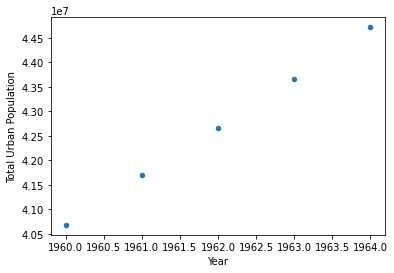

In [67]:
import matplotlib.pyplot as plt
# Code from previous exercise
urb_pop_reader = pd.read_csv('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv', chunksize=1000)
df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']
pops = zip(df_pop_ceb['Total Population'], 
           df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)
print(pops_list)
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(i[0]*i[1]*.01) for i in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

#### Writing an iterator to load data in chunks (4)
In the previous exercises, you've only processed the data from the first DataFrame chunk. This time, you will aggregate the results over all the DataFrame chunks in the dataset. This basically means you will be processing the entire dataset now. This is neat because you're going to be able to process the entire large dataset by just working on smaller pieces of it!

C:\Users\hp\AppData\Local\Temp\ipykernel_1452\2008958956.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\hp\AppData\Local\Temp\ipykernel_1452\2008958956.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_pop_ceb)
C:\Users\hp\AppData\Local\Temp\ipykernel_1452\2008958956.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

                          CountryName CountryCode  Year  Total Population  \
2      Central Europe and the Baltics         CEB  1960        91401583.0   
244    Central Europe and the Baltics         CEB  1961        92237118.0   
486    Central Europe and the Baltics         CEB  1962        93014890.0   
728    Central Europe and the Baltics         CEB  1963        93845749.0   
970    Central Europe and the Baltics         CEB  1964        94722599.0   
1212   Central Europe and the Baltics         CEB  1965        95447065.0   
1454   Central Europe and the Baltics         CEB  1966        96148635.0   
1696   Central Europe and the Baltics         CEB  1967        97043587.0   
1938   Central Europe and the Baltics         CEB  1968        97882394.0   
2180   Central Europe and the Baltics         CEB  1969        98602140.0   
2422   Central Europe and the Baltics         CEB  1970        99133296.0   
2664   Central Europe and the Baltics         CEB  1971        99638983.0   

C:\Users\hp\AppData\Local\Temp\ipykernel_1452\2008958956.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_pop_ceb)
C:\Users\hp\AppData\Local\Temp\ipykernel_1452\2008958956.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\hp\AppData\Local\Temp\ipykernel_1452\2008958956.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_pop_ceb)


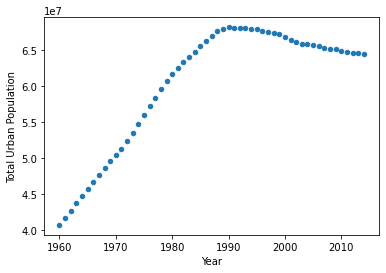

In [71]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv', chunksize=1000)

# Initialize empty DataFrame: data
data = pd.DataFrame()

# Iterate over each DataFrame chunk
for df_urb_pop in urb_pop_reader:

    # Check out specific country: df_pop_ceb
    df_pop_ceb = df_urb_pop.loc[df_urb_pop['CountryCode'] == 'CEB'] ### i used .oc for my warning

    # Zip DataFrame columns of interest: pops
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])

    # Turn zip object into list: pops_list
    pops_list = list(pops)

    # Use list comprehension to create new DataFrame column 'Total Urban Population'
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
    # Append DataFrame chunk to data: data
    data = data.append(df_pop_ceb)
print(data)
# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()



########for warning= https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas###

C:\Users\hp\AppData\Local\Temp\ipykernel_9900\1082341200.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
C:\Users\hp\AppData\Local\Temp\ipykernel_9900\1082341200.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(df_pop_ceb)
C:\Users\hp\AppData\Local\Temp\ipykernel_9900\1082341200.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

NameError: name 'plt' is not defined

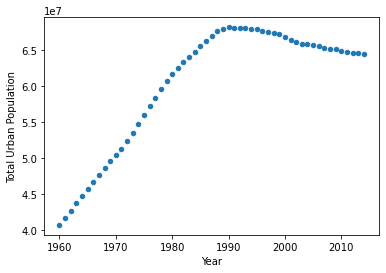

In [42]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader:
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'ind_pop_data.csv'

# Call plot_pop for country code 'CEB'
plot_pop('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv','CEB')

# Call plot_pop for country code 'ARB'

plot_pop('G:\\datacamp\\9. data science toolbox2\\world_ind_pop_data.csv','ARB')